In [1]:
from Modules.classes import * 
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.pyplot as plt

In [2]:
H = Hamiltonian(dim = 20) # define random hamiltonian
dt = H.energies.min() / 100 # dt value much smaller than lower energy in the system
t_f = 1 # time of integration

In [3]:
cmap_name = "coolwarm" # color of nodes
state_v = np.random.choice(np.linspace(0, 1, 1000), size = H.dim) # initialize random vector
state_v = state_v / np.linalg.norm(state_v) # normalize initial vector
state = State(state_v, H, networkx = True, col_map_nodes = cmap_name) # construct state object

states = state.propagate(H, dt = dt, t_final = t_f, networkx = True, sim_tol = 0, col_map_nodes = cmap_name) # propagating intial state

Propagating: 100%|█████████████████████████████| 50/50 [00:00<00:00, 346.94it/s]


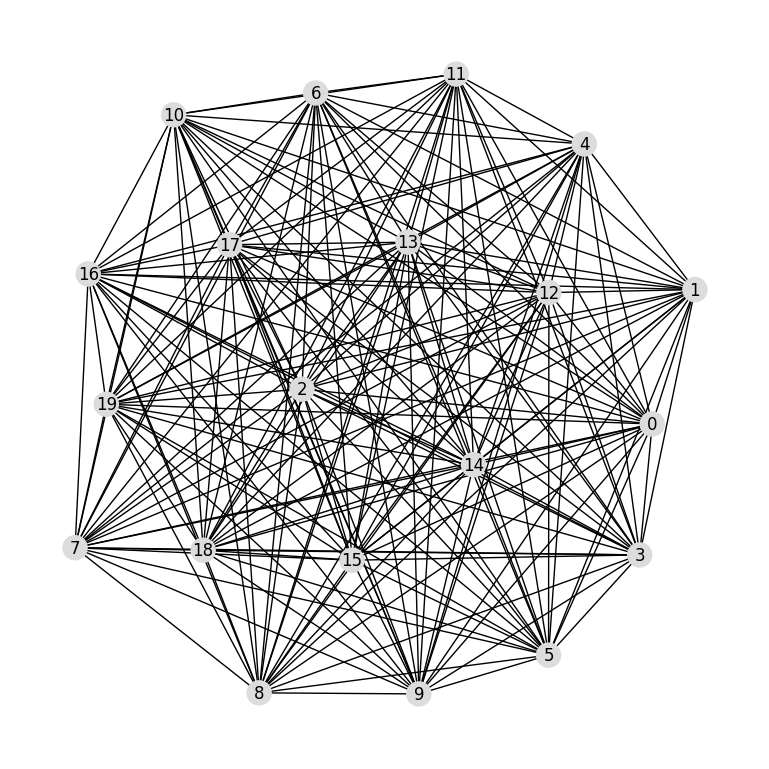

In [6]:
plt.rcParams["figure.figsize"] = [7.50, 7.50]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()

G = states[0].graph
thetas = np.linspace(0, 1.9 * np.pi, len(G.nodes))
circle_points = {node_id : [np.cos(thetas[node_id]), np.sin(thetas[node_id])] for node_id in [node_info["label"] for node_info in list(G.nodes.values())]} 
                 
nx.draw(G, with_labels=True, node_color = [G.nodes[i]["color"] for i in range(len(G.nodes))])
def animate(frame):
   fig.clear()
   G = states[frame].graph
   anim = nx.draw(G, pos = circle_points, with_labels=True, node_color = [G.nodes[i]["color"] for i in range(len(G.nodes))])

ani = FuncAnimation(fig, animate, frames=len(states), interval=100, repeat=False)
writergif = PillowWriter(fps=24)
#ani.save('/gifs/moviee.gif', writer = writergif) 
plt.show()